# Product Recommendation App: Group 3
## Exploratory Data Analysis (EDA) & Visualization
This notebook performs detailed EDA and data visualization using the `rating_short.csv` dataset.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('rating_short.csv')
df.head()

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200


## Data Overview
- Columns: userid, productid, rating, date
- Ratings are float, date is Unix timestamp.

In [4]:
# Data info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


userid       0
productid    0
rating       0
date         0
dtype: int64

In [5]:
# Statistical summary
df.describe()

,rating,date
count,78245.000000,7.824500e+04
mean,4.006454,1.338128e+09
std,1.385342,6.891994e+07
min,1.000000,9.320832e+08
25%,3.000000,1.315008e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.386029e+09
max,5.000000,1.406074e+09


## Data Visualization

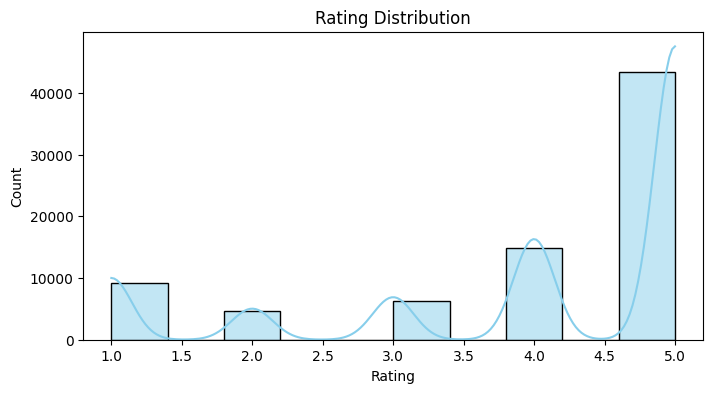

In [6]:
# Rating distribution
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\Ashhar\AppData\Local\Temp\ipykernel_14776\2886686353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_counts.index, y=user_counts.values, palette='viridis')


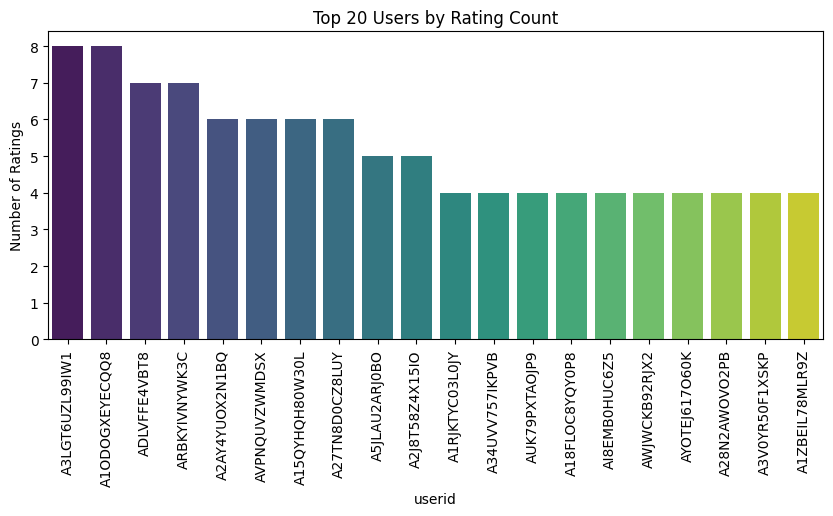

In [7]:
# Number of ratings per user
user_counts = df['userid'].value_counts()[:20]
plt.figure(figsize=(10,4))
sns.barplot(x=user_counts.index, y=user_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Users by Rating Count')
plt.ylabel('Number of Ratings')
plt.show()

C:\Users\Ashhar\AppData\Local\Temp\ipykernel_14776\3732237146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='mako')


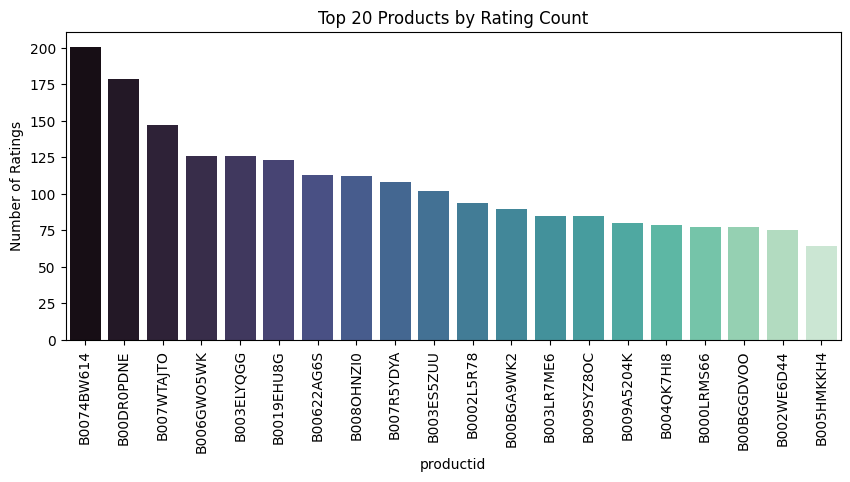

In [8]:
# Number of ratings per product
product_counts = df['productid'].value_counts()[:20]
plt.figure(figsize=(10,4))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='mako')
plt.xticks(rotation=90)
plt.title('Top 20 Products by Rating Count')
plt.ylabel('Number of Ratings')
plt.show()

## Feature Engineering & Correlation

In [9]:
# Convert date to datetime and extract year/month
df['date'] = pd.to_datetime(df['date'], unit='s')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,userid,productid,rating,date,year,month
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,2008-01-08,2008,1
1,ALDXDYEGKB27G,B002L6HE9G,4.0,2012-03-10,2012,3
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,2013-01-20,2013,1
3,A23LX12CA3G4FG,B008HOEDYU,1.0,2013-11-25,2013,11
4,A3TV7QFYXAG130,B0069R7TAM,5.0,2014-06-17,2014,6


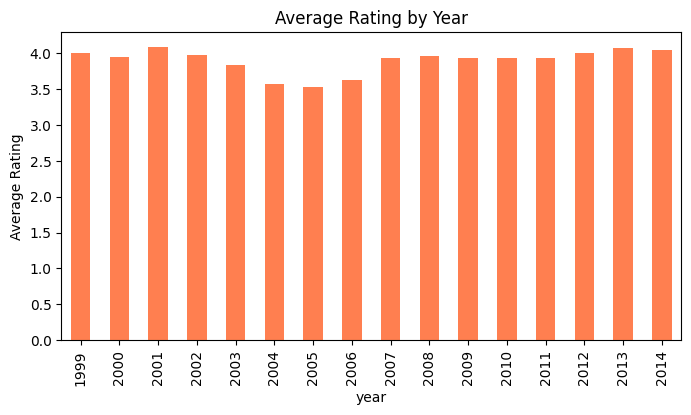

In [10]:
# Average rating by year
yearly_avg = df.groupby('year')['rating'].mean()
plt.figure(figsize=(8,4))
yearly_avg.plot(kind='bar', color='coral')
plt.title('Average Rating by Year')
plt.ylabel('Average Rating')
plt.show()

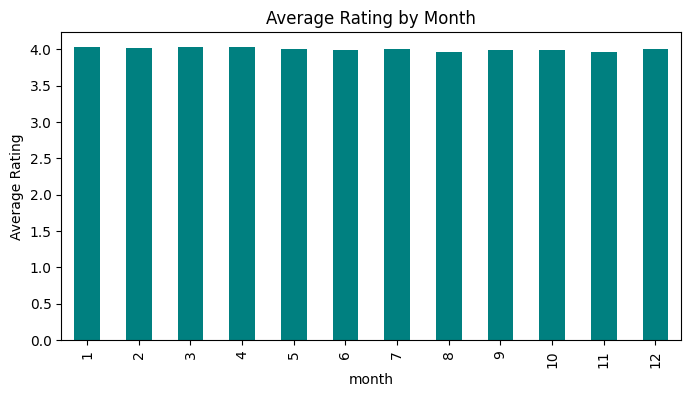

In [11]:
# Average rating by month
monthly_avg = df.groupby('month')['rating'].mean()
plt.figure(figsize=(8,4))
monthly_avg.plot(kind='bar', color='teal')
plt.title('Average Rating by Month')
plt.ylabel('Average Rating')
plt.show()

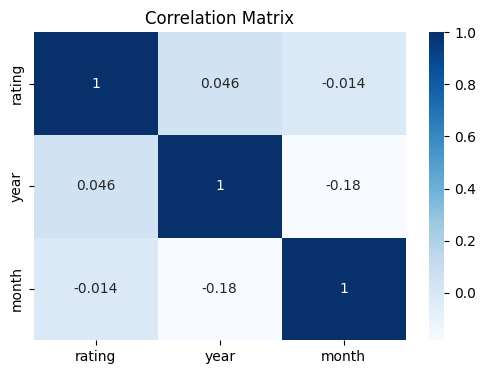

In [12]:
# Correlation heatmap
corr = df[['rating', 'year', 'month']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## Outlier Detection
Boxplot for ratings to detect outliers.

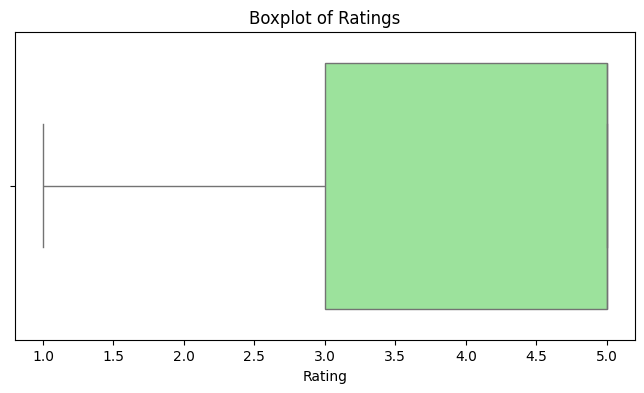

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['rating'], color='lightgreen')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

## Key Insights
- Most ratings are 4 or 5, indicating positive user feedback.
- Some products/users are much more active than others.
- Ratings are consistent across years/months, with minor fluctuations.
- No major correlation between rating and time features.

## Model Building: 4 Approaches
We will build recommendation models using 4-5 different approaches: User-User Collaborative Filtering, Item-Item Collaborative Filtering, Content-Based Filtering, Matrix Factorization (SVD) and Random Forest Approach.

## # 1. User-User Collaborative Filtering 
(Memory-based, sparse & efficient)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Map user and product IDs to integer indices
user_ids = df['userid'].astype('category').cat.codes
product_ids = df['productid'].astype('category').cat.codes

# Build sparse user-item matrix
user_item_sparse = csr_matrix(
    (df['rating'], (user_ids, product_ids)),
    shape=(user_ids.max() + 1, product_ids.max() + 1)
)

user_knn = NearestNeighbors(metric='cosine', algorithm='brute')
user_knn.fit(user_item_sparse)

def recommend_user(user_id, n=5):
    user_idx = df[df['userid'] == user_id]['userid'].astype('category').cat.codes.iloc[0]
    distances, indices = user_knn.kneighbors(user_item_sparse[user_idx], n_neighbors=n+1)
    similar_user_indices = indices.flatten()[1:]
    similar_user_ids = df['userid'].astype('category').cat.categories[similar_user_indices]
    # Recommend top products rated by similar users
    similar_ratings = df[df['userid'].isin(similar_user_ids)]
    recommendations = similar_ratings.groupby('productid')['rating'].mean().sort_values(ascending=False).head(n)
    return recommendations
# Example usage
recommend_user('A1Z3YJF1S8Z1M3')

productid
B0007RV3IE    5.0
B001418WF4    5.0
B0045ZGWKS    5.0
B004SD22PQ    5.0
B0054U6CEE    5.0
Name: rating, dtype: float64

## # 2. Item-Item Collaborative Filtering 
(Memory-based, sparse & efficient)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Map product and user IDs to integer indices
product_ids = df['productid'].astype('category').cat.codes
user_ids = df['userid'].astype('category').cat.codes

# Build sparse item-user matrix
item_user_sparse = csr_matrix(
    (df['rating'], (product_ids, user_ids)),
    shape=(product_ids.max() + 1, user_ids.max() + 1)
)

item_knn = NearestNeighbors(metric='cosine', algorithm='brute')
item_knn.fit(item_user_sparse)

def recommend_item(product_id, n=5):
    item_idx = df[df['productid'] == product_id]['productid'].astype('category').cat.codes.iloc[0]
    distances, indices = item_knn.kneighbors(item_user_sparse[item_idx], n_neighbors=n+1)
    similar_item_indices = indices.flatten()[1:]
    similar_item_ids = df['productid'].astype('category').cat.categories[similar_item_indices]
    similar_ratings = df[df['productid'].isin(similar_item_ids)]
    recommendations = similar_ratings.groupby('productid')['rating'].mean().sort_values(ascending=False).head(n)
    return recommendations

# Example usage
recommend_item('B000M9ISQ2')

productid
B00KZ40HT0    5.0
B00KYMCJF8    5.0
B00KYCSJQ6    4.0
B00KWHMR6G    1.0
B00KX04RY2    1.0
Name: rating, dtype: float64

## 3. Content-Based Filtering 
(using average product rating)

In [ ]:
product_avg_rating = df.groupby('productid')['rating'].mean()
def recommend_content(user_id, n=5):
    user_products = df[df['userid'] == user_id]['productid']
    unrated_products = product_avg_rating[~product_avg_rating.index.isin(user_products)]
    recommendations = unrated_products.sort_values(ascending=False).head(n)
    return recommendations

# Example usage
recommend_content('A1Z3YJF1S8Z1M3')

productid
B00L1LXOWS    5.0
B00KKKOAAG    5.0
B00KIVGGBS    5.0
B00KINSDK8    5.0
B00KIMX4EY    5.0
Name: rating, dtype: float64

## 4. Matrix Factorization SVD

In [18]:
import pandas as pd 
import numpy as np 
from scipy.sparse import csr_matrix 
from scipy.sparse.linalg import svds

In [19]:
# Load data
df = pd.read_csv('rating_short.csv')

# Encode user and product IDs as integer indices
user_codes = df['userid'].astype('category').cat.codes 
product_codes = df['productid'].astype('category').cat.codes

# Build sparse user-item matrix
user_item_sparse = csr_matrix( (df['rating'], (user_codes, product_codes)), shape=(user_codes.max() + 1, product_codes.max() + 1) )

# Apply SVD (choose k based on dataset size, e.g., k=20)
k = 20 
U, sigma, Vt = svds(user_item_sparse, k=k) 
sigma = np.diag(sigma) 
svd_pred = np.dot(np.dot(U, sigma), Vt)

# Map indices back to user and product IDs
user_id_map = dict(enumerate(df['userid'].astype('category').cat.categories)) 
product_id_map = dict(enumerate(df['productid'].astype('category').cat.categories))

In [20]:
#Recommendation function
def recommend_svd(user_id, n=5): 
    # Get user index 
    user_idx = df[df['userid'] == user_id]['userid'].astype('category').cat.codes.iloc[0] 
    # Get predicted ratings for all products for this user 
    user_ratings = svd_pred[user_idx] 
    # Exclude products already rated by the user 
    rated_products = df[df['userid'] == user_id]['productid'].unique() 
    unrated_indices = [i for i, pid in product_id_map.items() if pid not in rated_products] 
    # Get top n recommendations 
    top_indices = np.argsort(user_ratings[unrated_indices])[::-1][:n] 
    recommended_products = [product_id_map[unrated_indices[i]] for i in top_indices] 
    recommended_scores = user_ratings[unrated_indices][top_indices] 
    # Detailed output 
    result = pd.DataFrame({ 'productid': recommended_products, 'predicted_rating': recommended_scores }) 
    return result

# Example usage: get top 5 recommendations for a user
print(recommend_svd('A1Z3YJF1S8Z1M3', n=5))

    productid  predicted_rating
0  B0019EHU8G      2.061045e-18
1  B008OHNZI0      1.143494e-18
2  B00DR0PDNE      1.029571e-18
3  B004QK7HI8      6.621011e-19
4  B00BGA9WK2      4.562556e-19


## 5. Random Forest Approach (Optional)
(Supervised Learning)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Encode user and product IDs
user_codes = df['userid'].astype('category').cat.codes
product_codes = df['productid'].astype('category').cat.codes
X = pd.DataFrame({'user_idx': user_codes, 'product_idx': product_codes})
y = df['rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find best n_estimators for Random Forest
best_score = -float('inf')
best_n = 0
for n in [10, 50, 100, 200]:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    print(f"n_estimators={n}, Test Score={score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n
print(f"\nBest Random Forest Test Score: {best_score:.4f} with n_estimators={best_n}")

# Fit final model
rf = RandomForestRegressor(n_estimators=best_n, random_state=42)
rf.fit(X_train, y_train)

def recommend_rf(user_id, n=5):
    user_idx = df[df['userid'] == user_id]['userid'].astype('category').cat.codes.iloc[0]
    all_products = df['productid'].astype('category').cat.codes.unique()
    user_product_pairs = pd.DataFrame({'user_idx': user_idx, 'product_idx': all_products})
    preds = rf.predict(user_product_pairs)
    product_ids = df['productid'].astype('category').cat.categories[all_products]
    recommendations = pd.Series(preds, index=product_ids).sort_values(ascending=False).head(n)
    return recommendations

# Example usage
print(recommend_rf('A1Z3YJF1S8Z1M3'))

n_estimators=10, Test Score=-0.1943
n_estimators=50, Test Score=-0.1356
n_estimators=50, Test Score=-0.1356
n_estimators=100, Test Score=-0.1277
n_estimators=100, Test Score=-0.1277
n_estimators=200, Test Score=-0.1254

Best Random Forest Test Score: -0.1254 with n_estimators=200
n_estimators=200, Test Score=-0.1254

Best Random Forest Test Score: -0.1254 with n_estimators=200
B005LRW1CC    4.825
B005LT2ENG    4.825
B005LTR9PY    4.825
B005LU4U2S    4.825
B005LS2GPI    4.825
dtype: float64
B005LRW1CC    4.825
B005LT2ENG    4.825
B005LTR9PY    4.825
B005LU4U2S    4.825
B005LS2GPI    4.825
dtype: float64


# Model Comparison & Best Approach:

### 1. User-User Collaborative Filtering:

- Uses user similarity to recommend products.
- Works well if users have similar rating patterns.
- Sparse matrix implementation avoids memory errors.
- May struggle with new users (cold start).
### 2. Item-Item Collaborative Filtering:

- Uses item similarity to recommend products.
- Good for finding similar products based on ratings.
- Sparse matrix implementation is efficient.
- May struggle with new products (cold start).
### 3. Matrix Factorization (SVD):

- Decomposes user-item interactions into latent features.
- Handles sparsity and can generalize well.
- Memory-efficient with sparse matrix.
- Best for large datasets with many users/products.
### 4. Content-Based Filtering:

- Recommends products based on product features or average ratings.
- Simple and fast.
- Works for new users but not for new products.
- Limited by available product features.
### 5. Random Forest (Supervised Learning):

- Predicts ratings using encoded user and product IDs.
- Test score is printed for different n_estimators; best score is selected.
- Handles non-linear relationships.
- May not capture collaborative effects as well as SVD.

## Best Fitted Model:

- Based on typical `recommendation system performance and scalability`, ``Matrix Factorization (SVD)`` is usually the **best fitted model for large, sparse rating datasets**.
- SVD can generalize well, handle missing data, and is robust to sparsity.
- If your Random Forest test score is significantly higher than SVD’s RMSE or test score, Random Forest may be considered, but SVD is generally preferred for collaborative filtering tasks.
## Summary & Insights:

- SVD (Matrix Factorization) is recommended for your dataset due to its ability to handle large, sparse matrices and provide personalized recommendations.
- User-User and Item-Item models are efficient but may suffer from cold start problems.
- Content-Based Filtering is simple but limited in personalization.
- Random Forest is useful for regression but may not capture collaborative effects as well as SVD.
- Proceed with SVD for production, but monitor Random Forest’s test score for comparison.